In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
G=nx.barabasi_albert_graph(10,2)

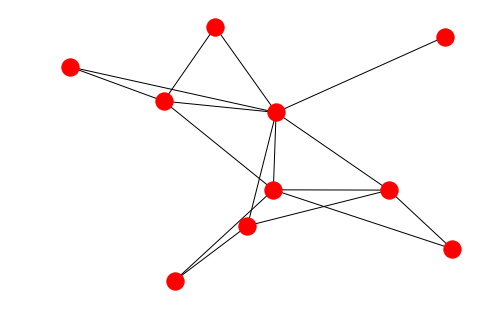

In [4]:
nx.draw_spring(G)

In [6]:
# Python program to find articulation points in an undirected graph 
   
from collections import defaultdict 
   
#This class represents an undirected graph  
#using adjacency list representation 
class Graph: 
   
    def __init__(self,vertices): 
        self.V= vertices #No. of vertices 
        self.graph = defaultdict(list) # default dictionary to store graph 
        self.Time = 0
   
    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
        self.graph[v].append(u) 
   
    '''A recursive function that find articulation points  
    using DFS traversal 
    u --> The vertex to be visited next 
    visited[] --> keeps tract of visited vertices 
    disc[] --> Stores discovery times of visited vertices 
    parent[] --> Stores parent vertices in DFS tree 
    ap[] --> Store articulation points'''
    def APUtil(self,u, visited, ap, parent, low, disc): 
  
        #Count of children in current node  
        children =0
  
        # Mark the current node as visited and print it 
        visited[u]= True
  
        # Initialize discovery time and low value 
        disc[u] = self.Time 
        low[u] = self.Time 
        self.Time += 1
  
        #Recur for all the vertices adjacent to this vertex 
        for v in self.graph[u]: 
            # If v is not visited yet, then make it a child of u 
            # in DFS tree and recur for it 
            if visited[v] == False : 
                parent[v] = u 
                children += 1
                self.APUtil(v, visited, ap, parent, low, disc) 
  
                # Check if the subtree rooted with v has a connection to 
                # one of the ancestors of u 
                low[u] = min(low[u], low[v]) 
  
                # u is an articulation point in following cases 
                # (1) u is root of DFS tree and has two or more chilren. 
                if parent[u] == -1 and children > 1: 
                    ap[u] = True
  
                #(2) If u is not root and low value of one of its child is more 
                # than discovery value of u. 
                if parent[u] != -1 and low[v] >= disc[u]: 
                    ap[u] = True    
                      
                # Update low value of u for parent function calls     
            elif v != parent[u]:  
                low[u] = min(low[u], disc[v]) 
  
  
    #The function to do DFS traversal. It uses recursive APUtil() 
    def AP(self): 
   
        # Mark all the vertices as not visited  
        # and Initialize parent and visited,  
        # and ap(articulation point) arrays 
        visited = [False] * (self.V) 
        disc = [float("Inf")] * (self.V) 
        low = [float("Inf")] * (self.V) 
        parent = [-1] * (self.V) 
        ap = [False] * (self.V) #To store articulation points 
  
        # Call the recursive helper function 
        # to find articulation points 
        # in DFS tree rooted with vertex 'i' 
        for i in range(self.V): 
            if visited[i] == False: 
                self.APUtil(i, visited, ap, parent, low, disc) 
  
        for index, value in enumerate (ap): 
            if value == True: print 'R',index , 
  

13

Articulation points in first graph 
R 0 R 3 R 4 R 8 R 9 R 10 R 11


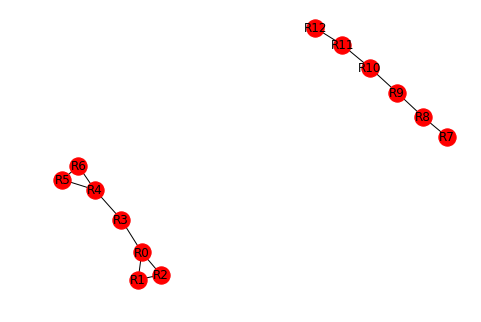

In [13]:
nb_nodes=input()
# Create a graph given in the above diagram 
g1 = Graph(nb_nodes) 
g1.addEdge(1, 0) 
g1.addEdge(0, 2) 
g1.addEdge(2, 1) 
g1.addEdge(0, 3) 
g1.addEdge(3, 4) 
g1.addEdge(4, 5) 
g1.addEdge(4, 6)
g1.addEdge(6, 5) 

G1=nx.Graph()
G1.add_node('R0')
G1.add_node('R1')
G1.add_node('R2')
G1.add_node('R3')
G1.add_node('R4')
G1.add_node('R5')
G1.add_node('R6')

G1.add_edge('R1','R0')
G1.add_edge('R0','R2')
G1.add_edge('R2','R1')
G1.add_edge('R0','R3')
G1.add_edge('R3','R4')
G1.add_edge('R4','R5')
G1.add_edge('R4','R6')
G1.add_edge('R6','R5')
G1.add_node('R7')
G1.add_node('R8')
G1.add_node('R9')
G1.add_node('R10')
G1.add_node('R11')
G1.add_node('R12')
G1.add_edge('R7','R8')
G1.add_edge('R8','R9')
G1.add_edge('R9','R10')
G1.add_edge('R10','R11')
G1.add_edge('R11','R12')
g1.addEdge(7, 8)
g1.addEdge(8, 9)
g1.addEdge(9, 10)
g1.addEdge(10, 11) 
g1.addEdge(11, 12) 
nx.draw(G1,with_labels=2)

print "\nArticulation points in first graph "
g1.AP() 